# Description

In this notebook, we will explore the raw en-vi dataset.

Currently, we use the list of dataset: 
- English Vietnamese Translation (envitrans). Link: https://www.kaggle.com/datasets/flightstar/english-vietnamese-dataset

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import regex as re

from utils import *

In [2]:
PATH_EN_FILE = r"raw_data/envitrans/en_sents"
PATH_VI_FILE = r"raw_data/envitrans/vi_sents"

PATH_FOLDER_PROCESS = r"processed_data"

# 1. Read dataset

In [3]:
list_en_sentence = read_text_file(PATH_EN_FILE)
list_vi_sentence = read_text_file(PATH_VI_FILE)

assert len(list_en_sentence) == len(list_vi_sentence)
print(f"Number of pair sentence: {len(list_en_sentence)}")

Number of pair sentence: 254090


In [4]:
idx = np.random.randint(0, len(list_en_sentence))

en_sentence = list_en_sentence[idx]
vi_sentence = list_vi_sentence[idx]

print(f"English: {en_sentence}")
print(f"Vietname: {vi_sentence}")

English: Any mushroom can be eaten, but some only once
Vietname: bất kỳ loại nấm nào cũng có thể ăn được, nhưng một số chỉ một lần


# 2. Explore dataset

## 2.1. Average length sentence

Max english sentence length: 47
Min english sentence length: 1
Mean english sentence length: 6.773643197292298


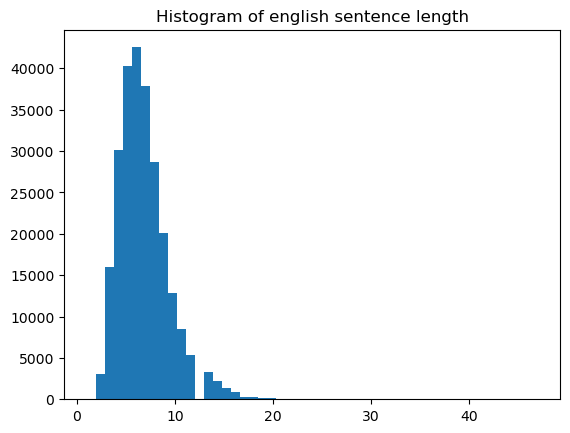

In [5]:
len_en_sentence = [get_len_sentence(en_sentence) for en_sentence in list_en_sentence]
len_en_sentence = np.array(len_en_sentence)

print(f"Max english sentence length: {len_en_sentence.max()}")
print(f"Min english sentence length: {len_en_sentence.min()}")
print(f"Mean english sentence length: {len_en_sentence.mean()}")

plt.title("Histogram of english sentence length")
plt.hist(len_en_sentence, bins=50);

Max Vietnamese sentence length: 61
Min Vietnamese sentence length: 1
Mean Vietnamese sentence length: 8.35013971427447


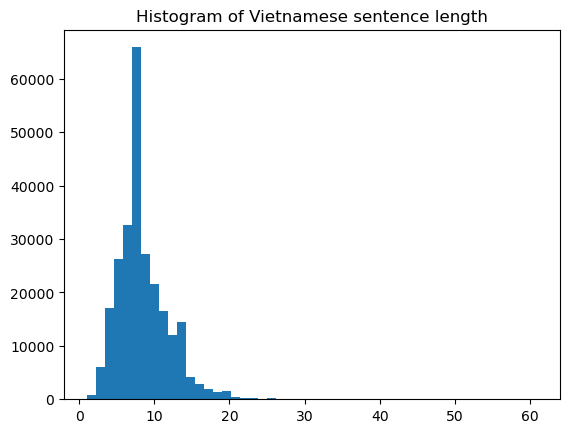

In [6]:
len_vi_sentence = [get_len_sentence(vi_sentence) for vi_sentence in list_vi_sentence]
len_vi_sentence = np.array(len_vi_sentence)

print(f"Max Vietnamese sentence length: {len_vi_sentence.max()}")
print(f"Min Vietnamese sentence length: {len_vi_sentence.min()}")
print(f"Mean Vietnamese sentence length: {len_vi_sentence.mean()}")

plt.title("Histogram of Vietnamese sentence length")
plt.hist(len_vi_sentence, bins=50);

## 2.2. Number of words

In this section, we will explore the number of words in English corpus and Vietnamese corpus.

In [7]:
en_vocab = get_vocab_from_list_sentence(list_en_sentence)
print(f"Number of word in English vocab: {len(en_vocab)}")
en_vocab[:10]

Number of word in English vocab: 40265


['vinegar.',
 "Life's",
 'farmer',
 'fitness',
 'heels',
 'alcoholic.',
 'faintly',
 'transpired',
 "I'm",
 'Period.']

In [8]:
vi_vocab = get_vocab_from_list_sentence(list_vi_sentence)
print(f"Number of word in Vietnamese vocab: {len(vi_vocab)}")
vi_vocab[:10]

Number of word in Vietnamese vocab: 15002


['vinci.',
 'Tim',
 'cocaine,',
 'clinton',
 'khảo.',
 'lida',
 'bén',
 'betty',
 'riêng.',
 'tiêu,']

# 3. Process dataset

In this section, we will format sentence with the following criteria:
- Convert to lowercase.
- Add spaces around punctuation.

In [9]:
list_en_sentence = [format_sentence(en_sentence) for en_sentence in list_en_sentence]
list_vi_sentence = [format_sentence(vi_sentence) for vi_sentence in list_vi_sentence]

assert len(list_en_sentence) == len(list_vi_sentence)
print(f"Number of pair sentence: {len(list_en_sentence)}")

Number of pair sentence: 254090


In [12]:
idx = np.random.randint(0, len(list_en_sentence))

en_sentence = list_en_sentence[idx]
vi_sentence = list_vi_sentence[idx]

print(f"English: {en_sentence}")
print(f"Vietname: {vi_sentence}")

English: i don't want things to change .
Vietname: tôi không muốn mọi thứ thay đổi


## 3.1. Save process text

In [13]:
save_sentences_to_file(list_en_sentence, os.path.join(PATH_FOLDER_PROCESS, "envitrans_en_sent.txt"))
save_sentences_to_file(list_vi_sentence, os.path.join(PATH_FOLDER_PROCESS, "envitrans_vi_sent.txt"))